Problem Statement:This Project we are going to analyse the student's  performance of (testscores)is affected by other variables such as Gender,Ethnicity,Parental Level of education ,Lunch and Test Preparation Course

2.Data Collection
.Dataset Source-https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data

.The dataset contains information about students' performance in exams. The dataset has 24 features and 1000

2.1 Import Data and Required Packages

importing Pandas,Numpy,Matplotlib,Seaborn and Warnings Library


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Import the CSV Data as Pandas DataFrame

In [2]:
df = pd.read_csv("data/StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [5]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

In [6]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [7]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Exploring Data

In [9]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
print("Categories in gender",df['gender'].unique())
print("Categories in lunch",df['lunch'].unique())
print("Categories in 'test_preparation_course",df['test preparation course'].unique())

Categories in gender ['female' 'male']
Categories in lunch ['standard' 'free/reduced']
Categories in 'test_preparation_course ['none' 'completed']


In [11]:
#OBTAINING NUMERIC FEATURES AND CATEGORICAL FEATURES
numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns
print('We have {}numerical features :{}'.format(len(numeric_features),numeric_features))
print('We have {}categorical features :{}'.format(len(categorical_features),categorical_features))

We have 3numerical features :Index(['math score', 'reading score', 'writing score'], dtype='object')
We have 5categorical features :Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')


ADDING COLUMNS FOR TOTAL SCORE AND AVERAGE SCORE 

In [12]:
df['Total_Score']=df['math score']+df['reading score']+df['writing score']
df['Average']=df['Total_Score']/3
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   Total_Score    Average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          2

In [13]:
reading_full=df[df['reading score']==100]['Average'].count()
math_full=df[df['math score']==100]['Average'].count()
writing_full=df[df['writing score']==100]['Average'].count()

print(f'number of students who scored full in maths:{math_full}')
print(f'number of students who scored full in reading:{reading_full}')
print(f'number of students who scored full in writing:{writing_full}')

number of students who scored full in maths:7
number of students who scored full in reading:17
number of students who scored full in writing:14


In [14]:
reading_less=df[df['reading score']<=20]['Average'].count()
maths_less=df[df['math score']<=20]['Average'].count()
writing_less=df[df['writing score']<=20]['Average'].count()

print(f'Number of students who scored less than 20 in reading:{reading_less}')
print(f'Number of students who scored less than 20 in writing:{writing_less}')
print(f'Number of students who scored less than 20 in maths:{maths_less}')


Number of students who scored less than 20 in reading:1
Number of students who scored less than 20 in writing:3
Number of students who scored less than 20 in maths:4


From above we understood the students have performed the worst in maths 

Exploring Data(Visualisation)

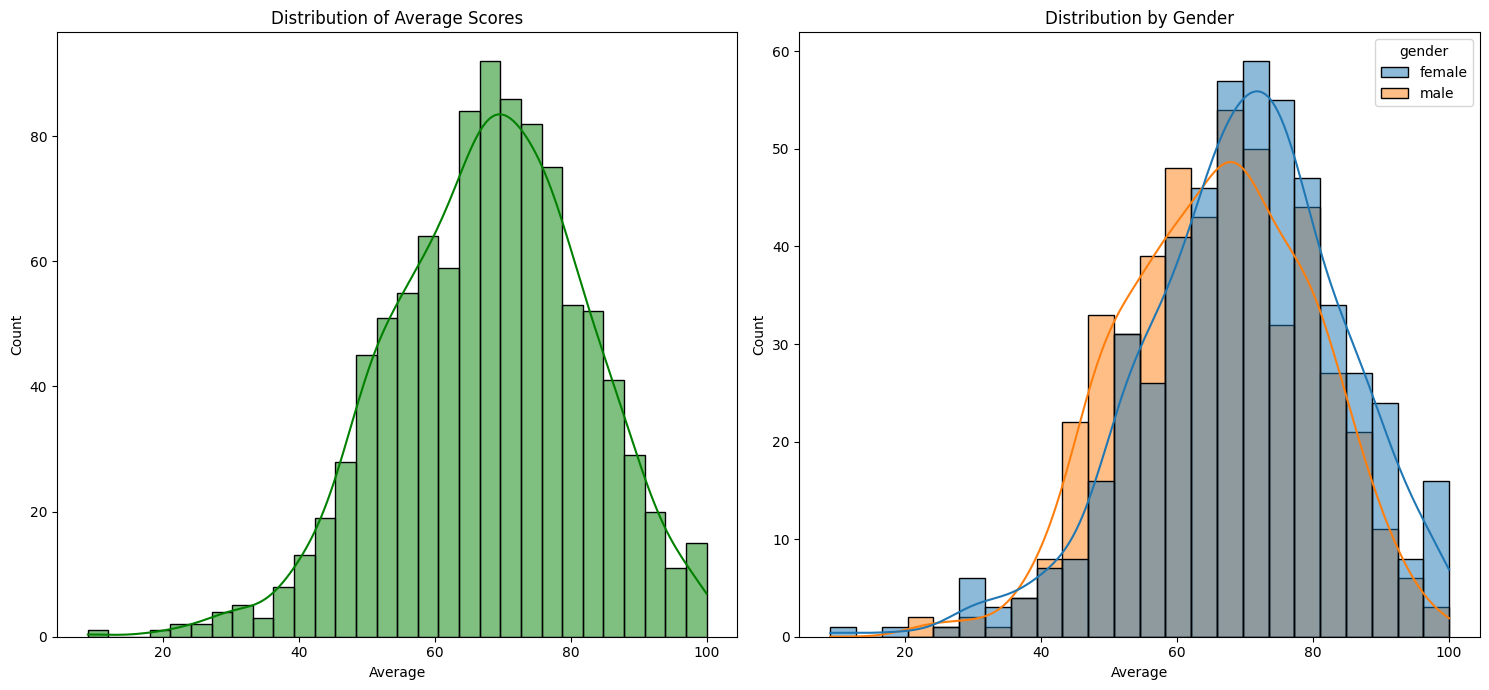

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First plot using axs[0]
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title("Distribution of Average Scores")

# Second plot using axs[1]
sns.histplot(data=df, x='Average', kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Distribution by Gender")

plt.tight_layout()
plt.show()


Female are Scoring Better

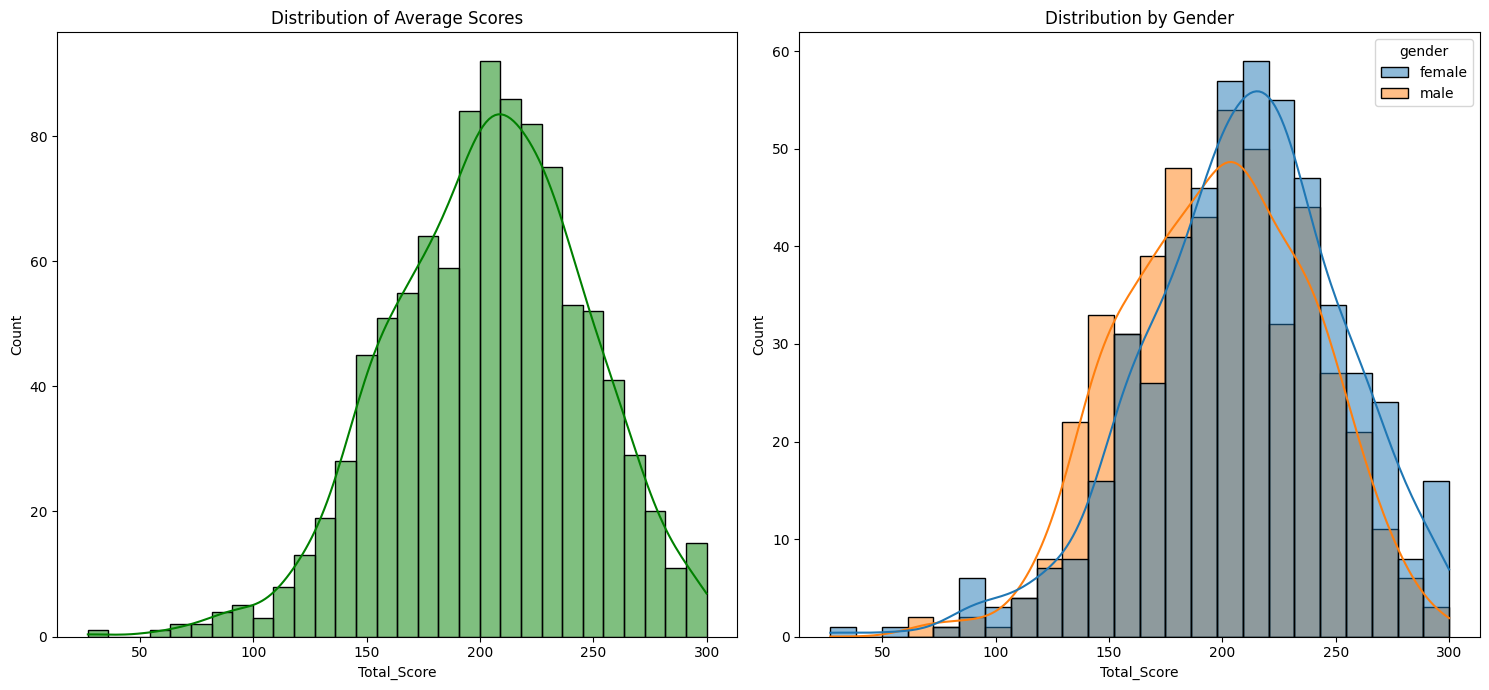

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First plot using axs[0]
sns.histplot(data=df, x='Total_Score', bins=30, kde=True, color='g', ax=axs[0])
axs[0].set_title("Distribution of Average Scores")

# Second plot using axs[1]
sns.histplot(data=df, x='Total_Score', kde=True, hue='gender', ax=axs[1])
axs[1].set_title("Distribution by Gender")

plt.tight_layout()
plt.show()

Lunch

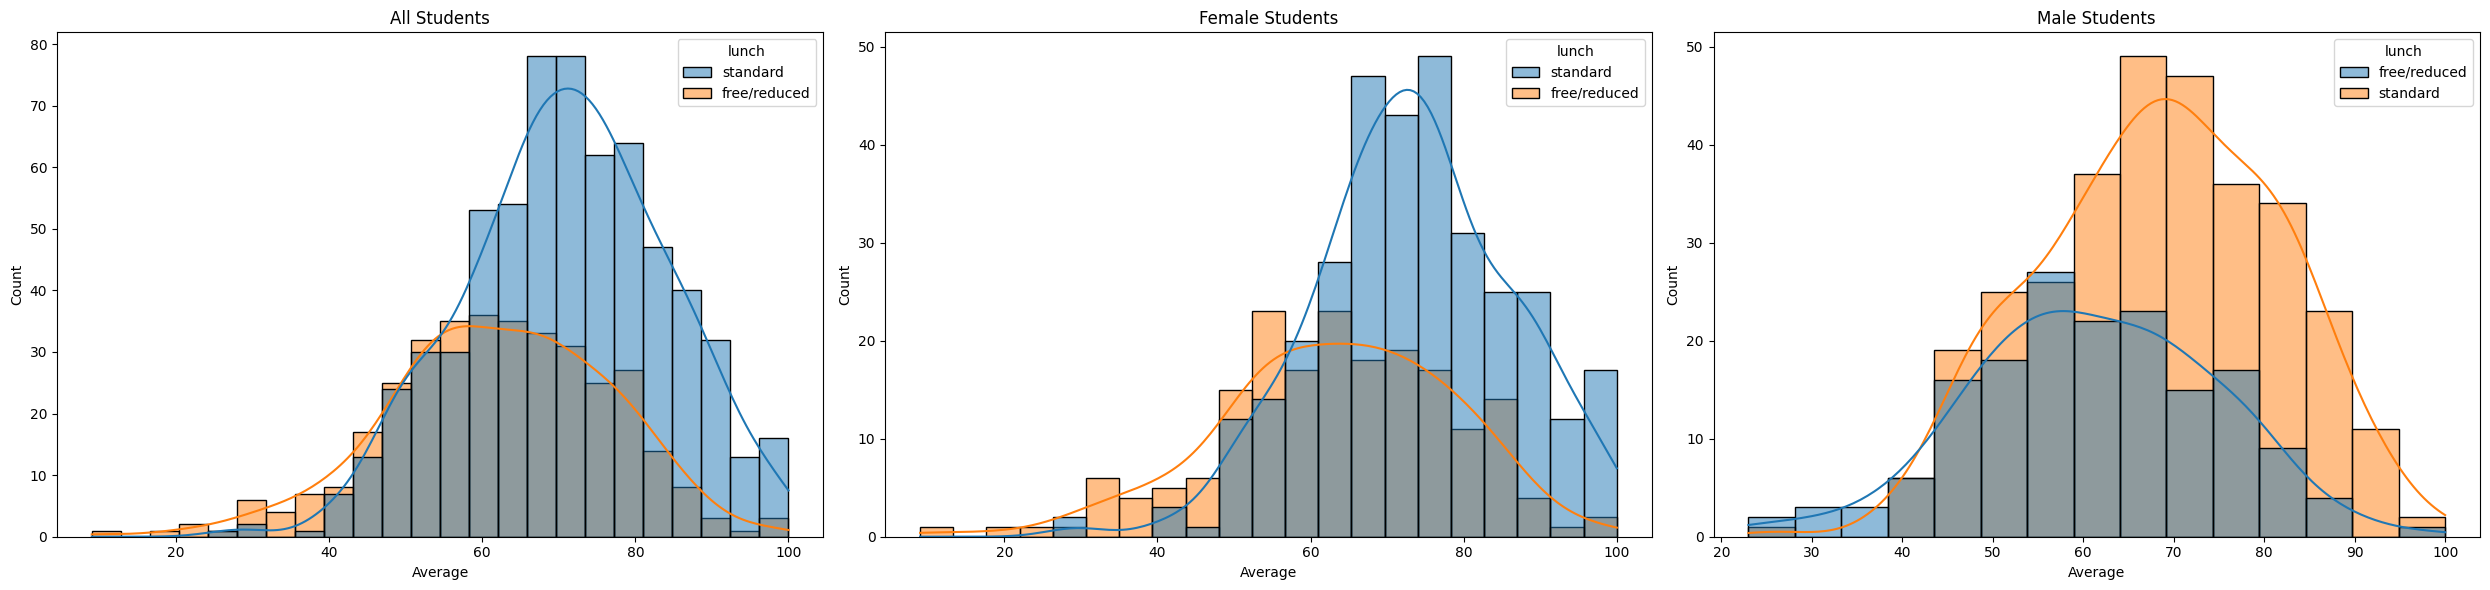

In [17]:
plt.figure(figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='Average', kde=True, hue='lunch')
plt.title('All Students')

plt.subplot(132)
sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='lunch')
plt.title('Female Students')

plt.subplot(133)
sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='lunch')
plt.title('Male Students')

plt.tight_layout()
plt.show()


In [18]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


Text(0.5, 1.0, 'All Students')

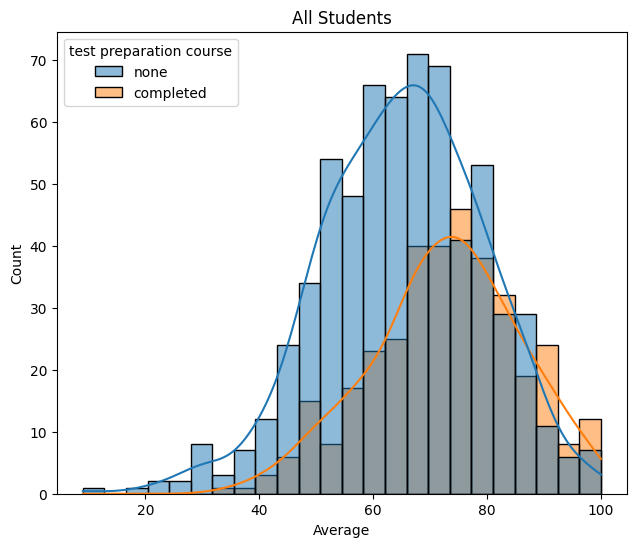

In [19]:
plt.figure(figsize=(25, 6))

plt.subplot(131)
sns.histplot(data=df, x='Average', kde=True, hue='test preparation course')
plt.title('All Students')

In [20]:
df['test preparation course'].value_counts()
1

1